In [1]:
import pandas as pd
import matplotlib.pylab as plt
import re
import datetime as dt
import math

In [2]:
plt.rcParams['figure.dpi'] = 200

In [3]:
df = pd.read_csv("data/sales.csv")

In [4]:
df.shape

(2823, 22)

In [5]:
df.dtypes

ADDRESSLINE1         object
CITY                 object
CONTACTFIRSTNAME     object
CONTACTLASTNAME      object
COUNTRY              object
CUSTOMERNAME         object
DEALSIZE             object
MONTH_ID              int64
MSRP                  int64
ORDERDATE            object
ORDERLINENUMBER       int64
ORDERNUMBER           int64
PHONE                object
PRICEEACH           float64
PRODUCTCODE          object
PRODUCTLINE          object
QTR_ID                int64
QUANTITYORDERED       int64
SALES               float64
STATUS               object
TERRITORY2           object
YEAR_ID               int64
dtype: object

In [6]:
quantitative_variables = df.describe().columns.tolist()
df.describe()

,MONTH_ID,MSRP,ORDERLINENUMBER,ORDERNUMBER,PRICEEACH,QTR_ID,QUANTITYORDERED,SALES,YEAR_ID
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000
mean,7.092455,100.715551,6.466171,10258.725115,83.658544,2.717676,35.092809,3553.889072,2003.81509
std,3.656633,40.187912,4.225841,92.085478,20.174277,1.203878,9.741443,1841.865106,0.69967
min,1.000000,33.000000,1.000000,10100.000000,26.880000,1.000000,6.000000,482.130000,2003.00000
25%,4.000000,68.000000,3.000000,10180.000000,68.860000,2.000000,27.000000,2203.430000,2003.00000
50%,8.000000,99.000000,6.000000,10262.000000,95.700000,3.000000,35.000000,3184.800000,2004.00000
75%,11.000000,124.000000,9.000000,10333.500000,100.000000,4.000000,43.000000,4508.000000,2004.00000
max,12.000000,214.000000,18.000000,10425.000000,100.000000,4.000000,97.000000,14082.800000,2005.00000


In [7]:
nombres_columns = df.columns.tolist()
qualitative_variables = list(set(nombres_columns) - set(quantitative_variables))
for x in sorted(qualitative_variables):
    print(x)

ADDRESSLINE1
CITY
CONTACTFIRSTNAME
CONTACTLASTNAME
COUNTRY
CUSTOMERNAME
DEALSIZE
ORDERDATE
PHONE
PRODUCTCODE
PRODUCTLINE
STATUS
TERRITORY2


# SALES Time Series

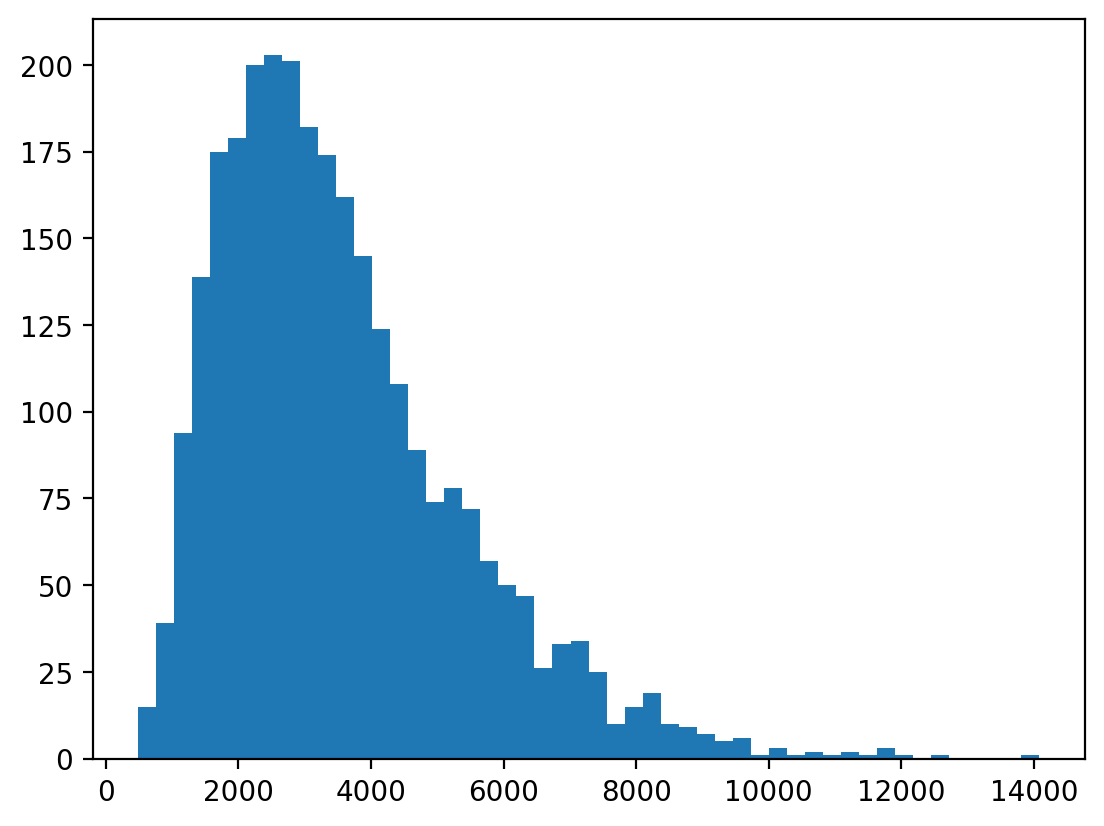

In [8]:
plt.hist(df.loc[:, 'SALES'], 50)
plt.show()

In [9]:
# 2 option
#df['DATE_INV'] = df['ORDERDATE'].apply(lambda x: dt.datetime.strptime(x, '%m/%d/%Y %H:%M').date())

In [10]:
# Checking if it is the same hour
df['TIME'] = pd.to_datetime(df['ORDERDATE']).dt.time
df.TIME.value_counts()

00:00:00    2823
Name: TIME, dtype: int64

In [11]:
del(df['TIME'])

In [12]:
#df['YEAR'] = pd.to_datetime(df['ORDERDATE']).dt.year
#df['MONTH'] = pd.to_datetime(df['ORDERDATE']).dt.month

In [13]:
df['TSDATE'] = pd.to_datetime(df['ORDERDATE']).dt.to_period('M')

In [14]:
df['TSDATE'] = df['TSDATE'].astype(str)

In [15]:
df['TSDATE_YM'] = df['TSDATE'].apply(lambda x: dt.datetime.strptime(x, '%Y-%m'))

In [16]:
df['TSDATE_F'] = pd.to_datetime(df['ORDERDATE'])

In [17]:
df.dtypes

ADDRESSLINE1                object
CITY                        object
CONTACTFIRSTNAME            object
CONTACTLASTNAME             object
COUNTRY                     object
CUSTOMERNAME                object
DEALSIZE                    object
MONTH_ID                     int64
MSRP                         int64
ORDERDATE                   object
ORDERLINENUMBER              int64
ORDERNUMBER                  int64
PHONE                       object
PRICEEACH                  float64
PRODUCTCODE                 object
PRODUCTLINE                 object
QTR_ID                       int64
QUANTITYORDERED              int64
SALES                      float64
STATUS                      object
TERRITORY2                  object
YEAR_ID                      int64
TSDATE                      object
TSDATE_YM           datetime64[ns]
TSDATE_F            datetime64[ns]
dtype: object

In [18]:
ts_g = df.loc[:, ['TSDATE_F', 'TSDATE_YM', 'SALES']]
ts_g_d = df.loc[:, ['TSDATE_F', 'TSDATE_YM', 'SALES']]

In [19]:
ts_g = ts_g.groupby(['TSDATE_YM']).sum()
ts_g = ts_g.reset_index()
ts_g_d = ts_g_d.groupby(['TSDATE_F']).sum()
ts_g_d = ts_g_d.reset_index()

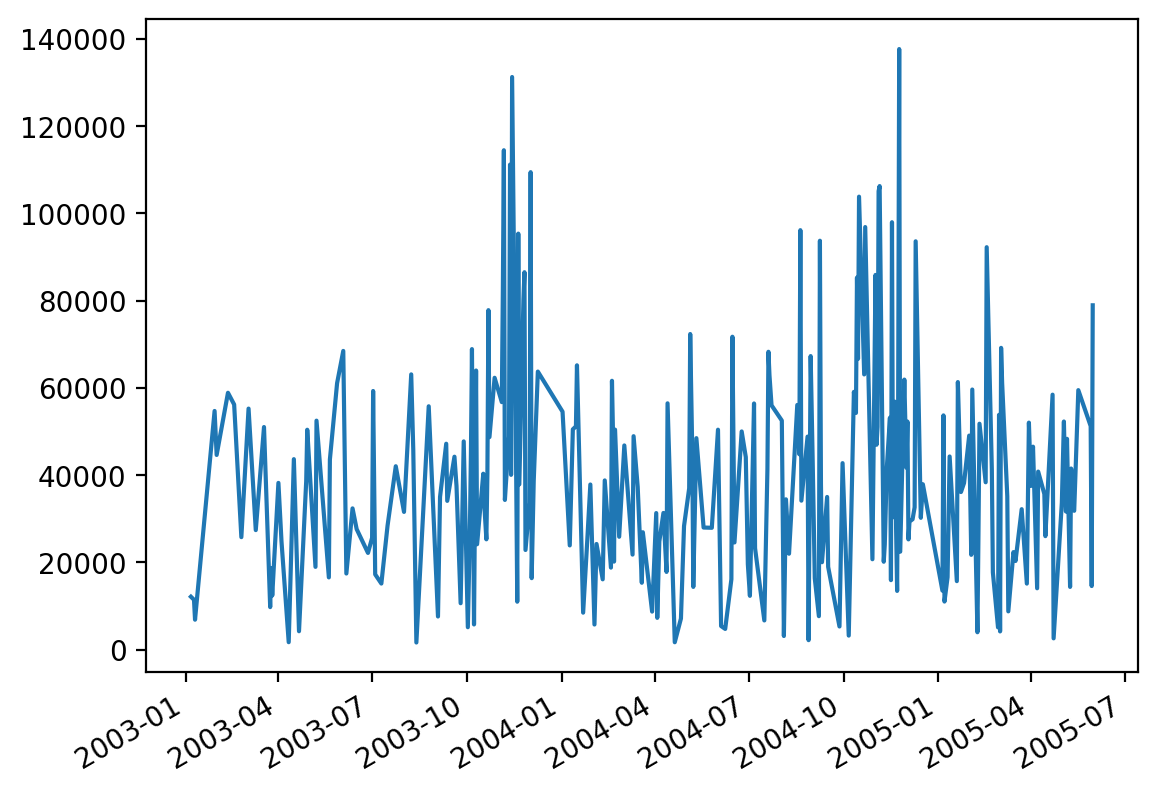

In [20]:
# Time series of SALES by Month but adding the days

plt.plot(ts_g_d['TSDATE_F'], ts_g_d['SALES'])
plt.gcf().autofmt_xdate()

In [21]:
q = 30
ts_g_d['SALES_MA'] = ts_g_d['SALES']
ts_g_d['SALES_MA'] = ts_g_d['SALES_MA'].rolling(window=q).mean()
ts_g_d = ts_g_d.iloc[(q-1):]

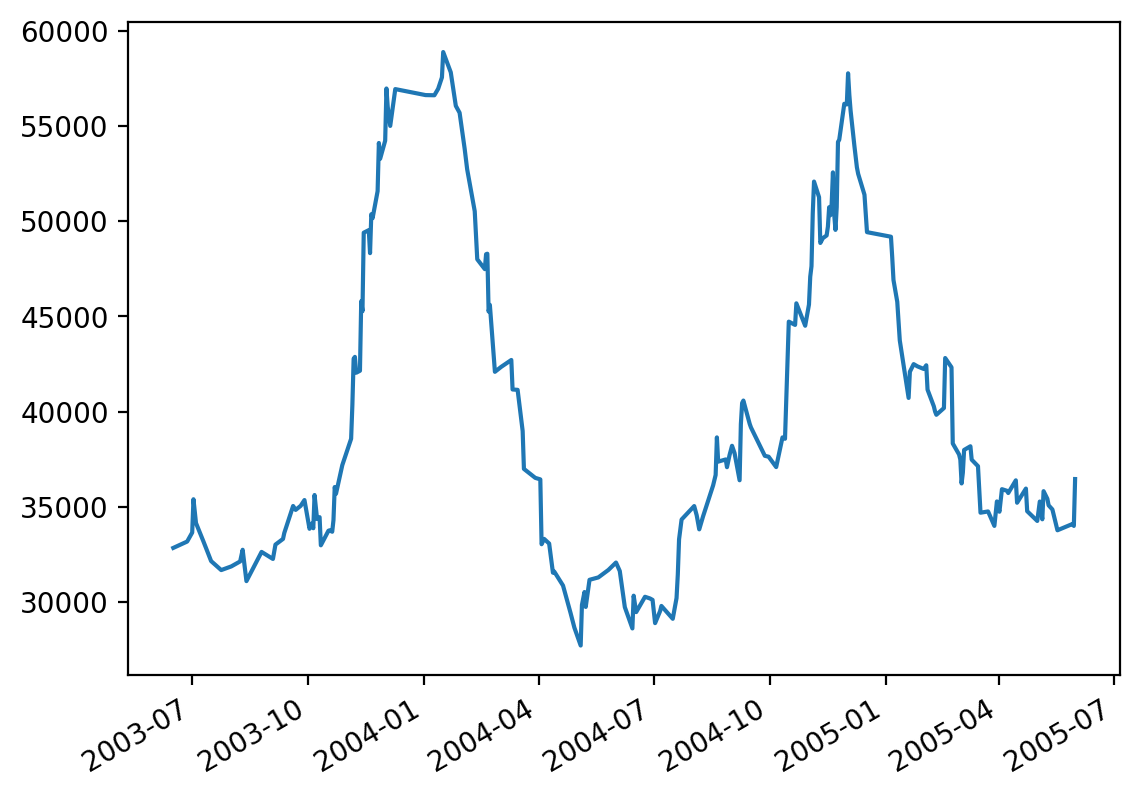

In [22]:
plt.plot(ts_g_d['TSDATE_F'], ts_g_d['SALES_MA'])
plt.gcf().autofmt_xdate()

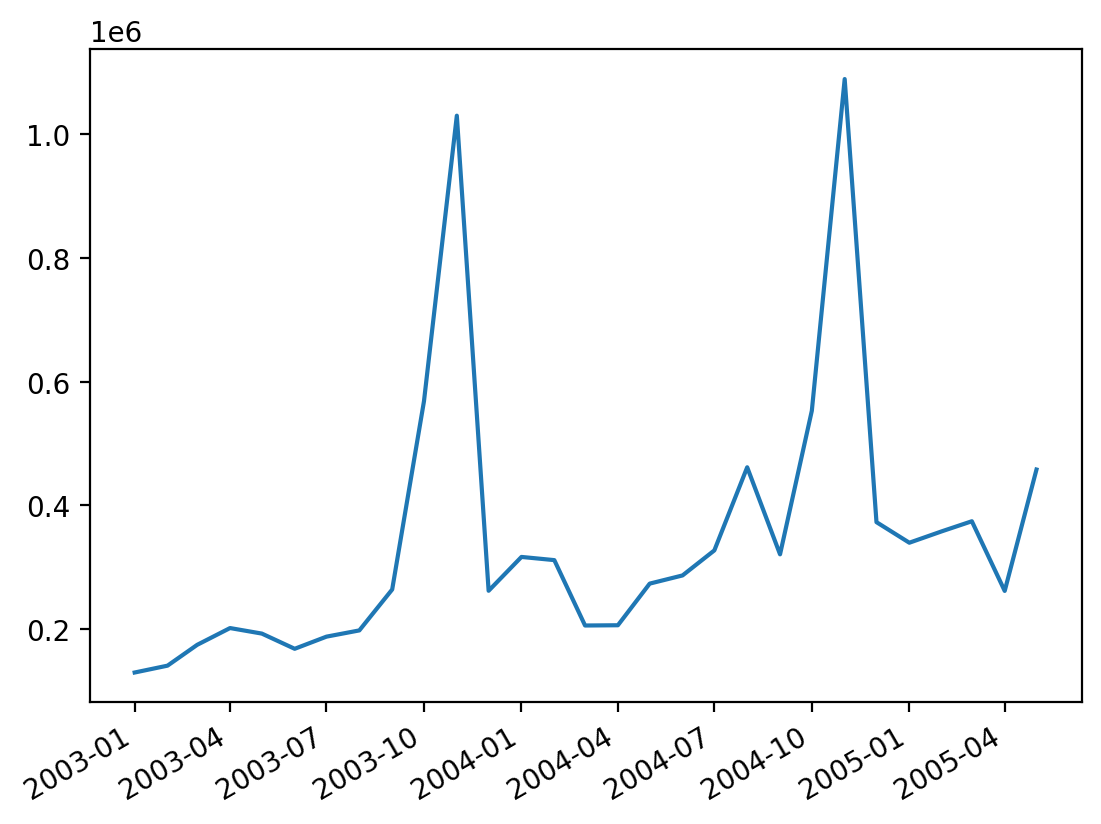

In [23]:
# Time series of SALES by Month
plt.plot(ts_g['TSDATE_YM'], ts_g['SALES'])
plt.gcf().autofmt_xdate()

In [23]:
ts_g.to_csv("data/ts_sales_months.csv", header=True, index=False)
ts_g_d.to_csv("data/ts_sales_full.csv", header=True, index=False)

In [24]:
territories_var = list(df['TERRITORY2'].value_counts().index)
territories_var

['EMEA', 'NORTHAME', 'AUSTRALIA', 'ASIA']

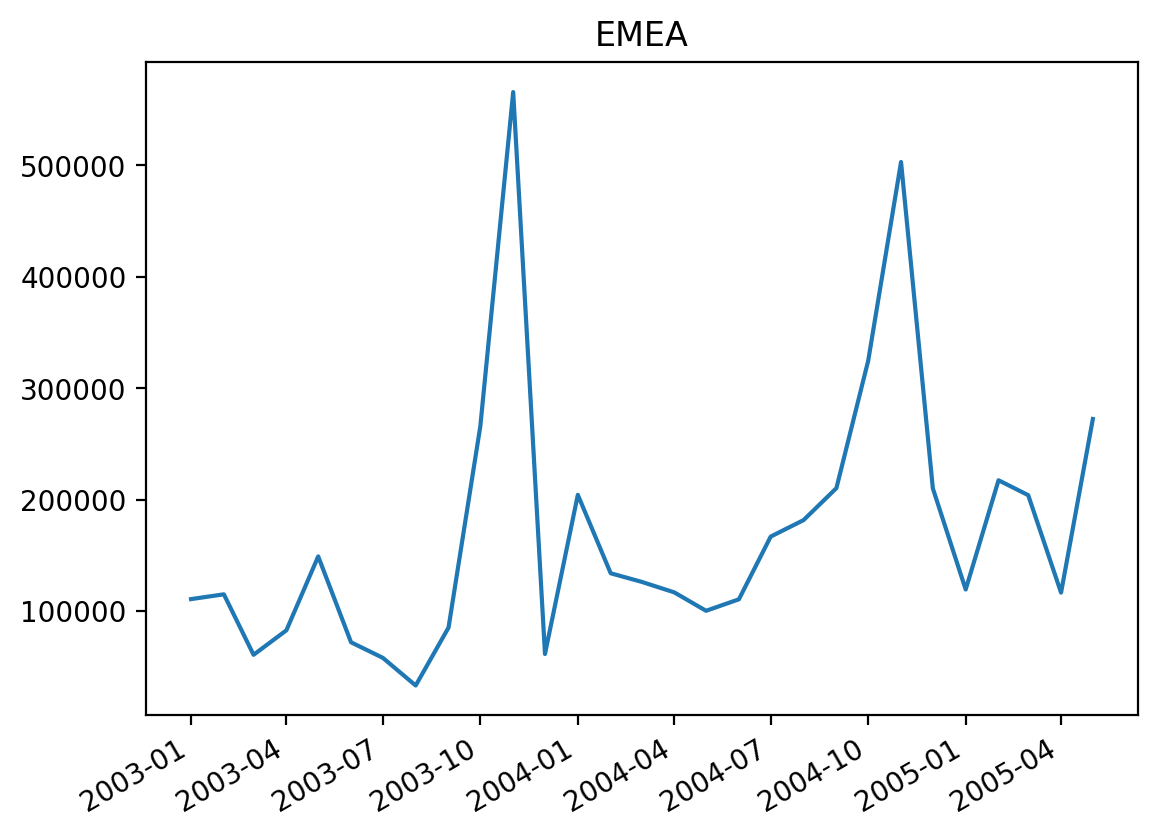

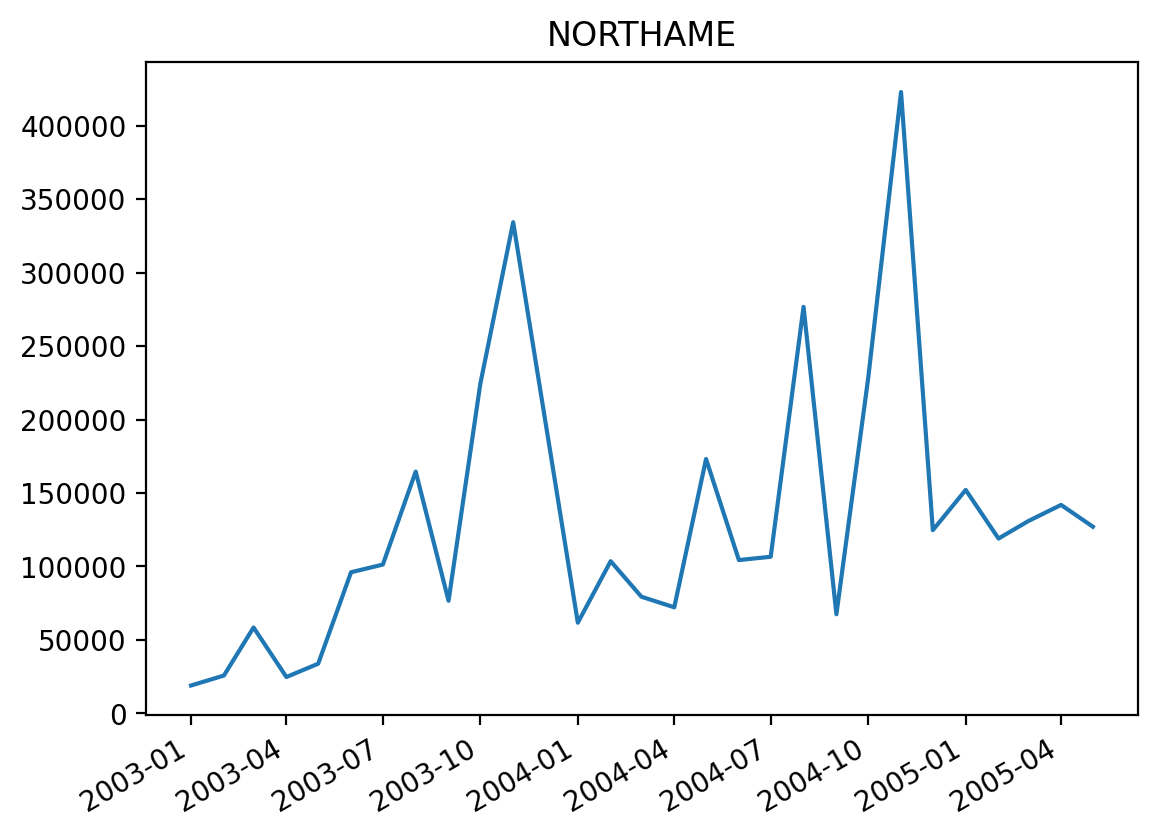

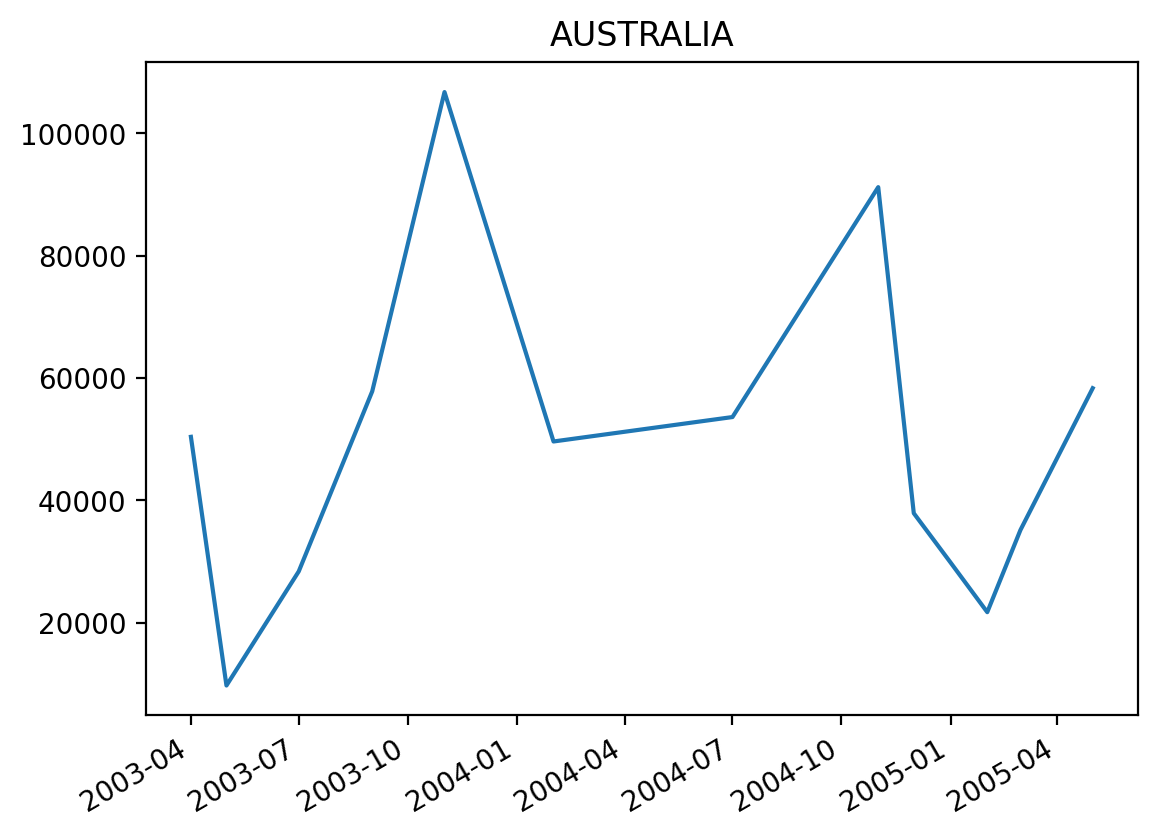

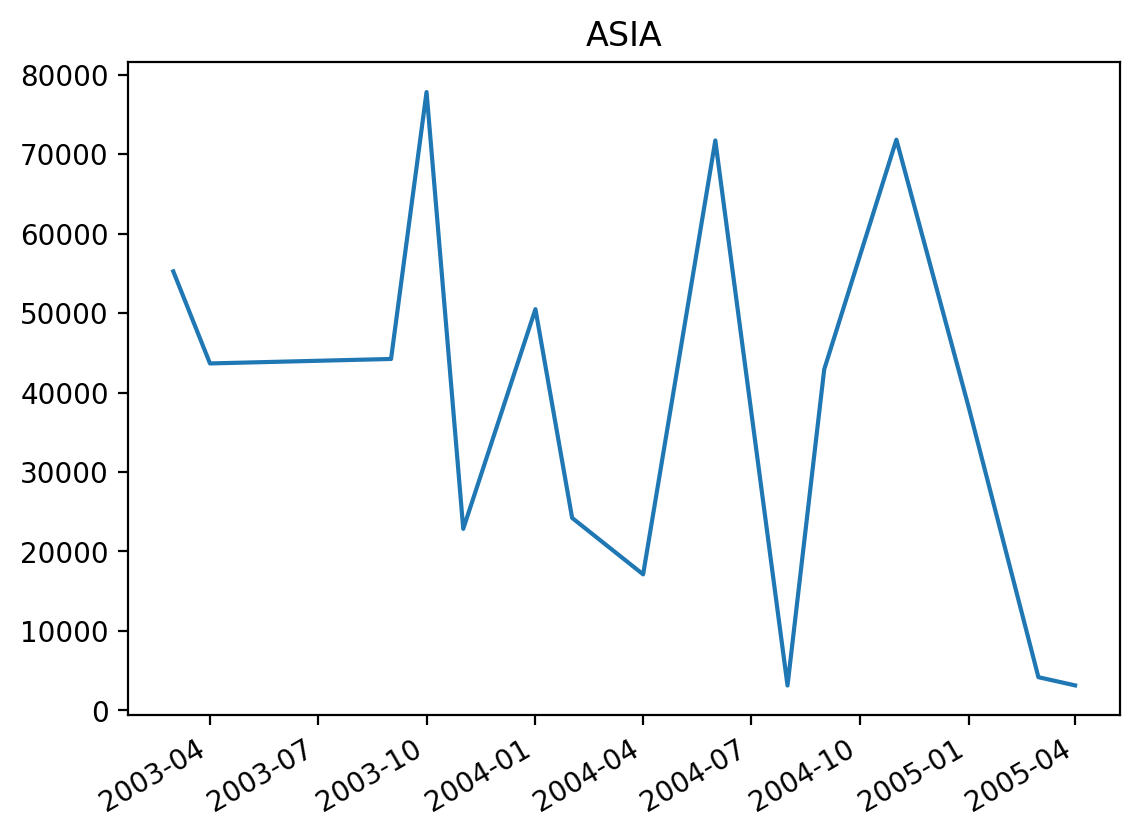

In [25]:
for i in range(len(territories_var)):
    dfTemp = df.loc[df.loc[:, 'TERRITORY2'] == territories_var[i], ['TSDATE_F', 'TSDATE_YM', 'SALES']].groupby(['TSDATE_YM']).sum()
    dfTemp = dfTemp.reset_index()
    plt.title(territories_var[i])
    plt.plot(dfTemp['TSDATE_YM'], dfTemp['SALES'])
    plt.gcf().autofmt_xdate()
    plt.show()

In [26]:
territories_var

['EMEA', 'NORTHAME', 'AUSTRALIA', 'ASIA']

In [27]:
var_number = -1
dfTemp = df.loc[df.loc[:, 'TERRITORY2'] == territories_var[var_number], ['TSDATE_F', 'TSDATE_YM', 'SALES']].groupby(['TSDATE_YM']).sum()
dfTemp = dfTemp.reset_index()
dfTemp.to_csv("data/sales_"+ territories_var[var_number] +".csv", header=True, index=False)

# More exploration

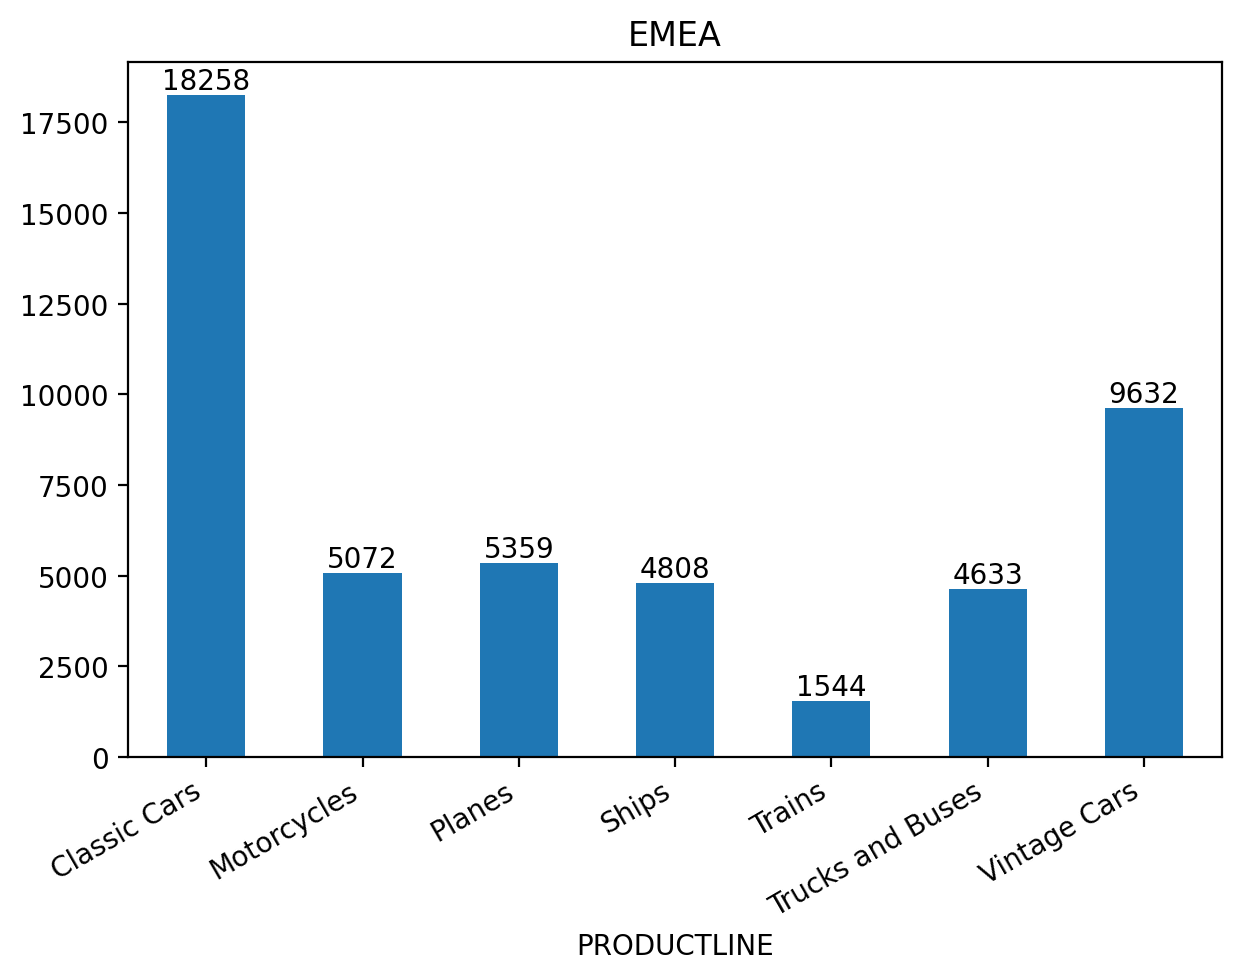

In [28]:
dfTemp = df.loc[df.loc[:, 'TERRITORY2'] == territories_var[0], ['PRODUCTLINE', 'QUANTITYORDERED']]
dfTemp = dfTemp.groupby(['PRODUCTLINE']).sum()
dfTemp = dfTemp.reset_index()
ax = dfTemp.plot(x='PRODUCTLINE', y='QUANTITYORDERED', kind='bar', legend=False, rot=0)
ax.bar_label(ax.containers[0], label_type='edge')
plt.title(territories_var[0])
plt.tight_layout()
plt.gcf().autofmt_xdate()
plt.savefig("images/emea_product_line.png")
plt.show()

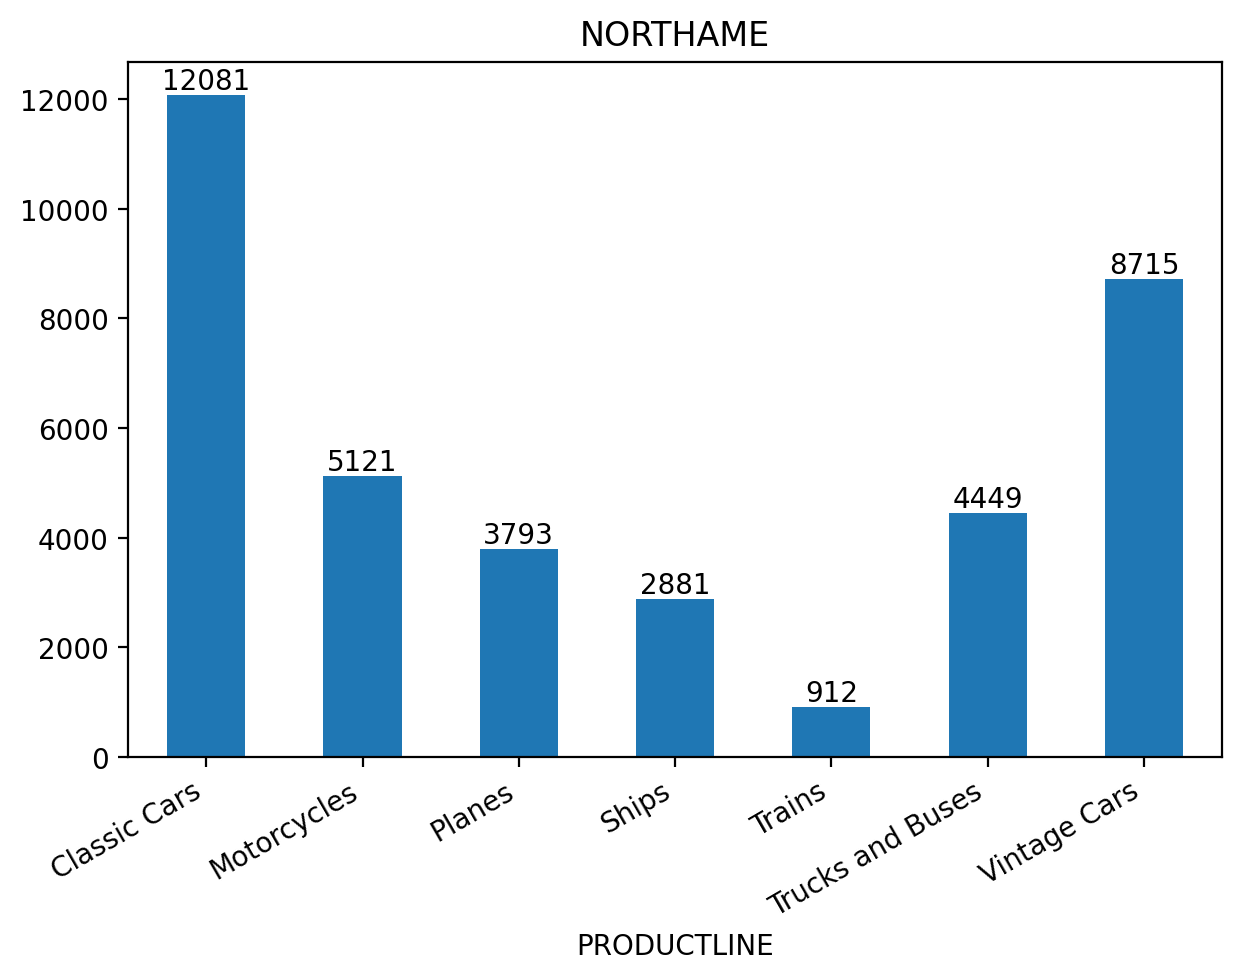

In [29]:
dfTemp = df.loc[df.loc[:, 'TERRITORY2'] == territories_var[1], ['PRODUCTLINE', 'QUANTITYORDERED']]
dfTemp = dfTemp.groupby(['PRODUCTLINE']).sum()
dfTemp = dfTemp.reset_index()
ax = dfTemp.plot(x='PRODUCTLINE', y='QUANTITYORDERED', kind='bar', legend=False, rot=0)
ax.bar_label(ax.containers[0], label_type='edge')
plt.title(territories_var[1])
plt.tight_layout()
plt.gcf().autofmt_xdate()
plt.savefig("images/northamerica_product_line.png")
plt.show()

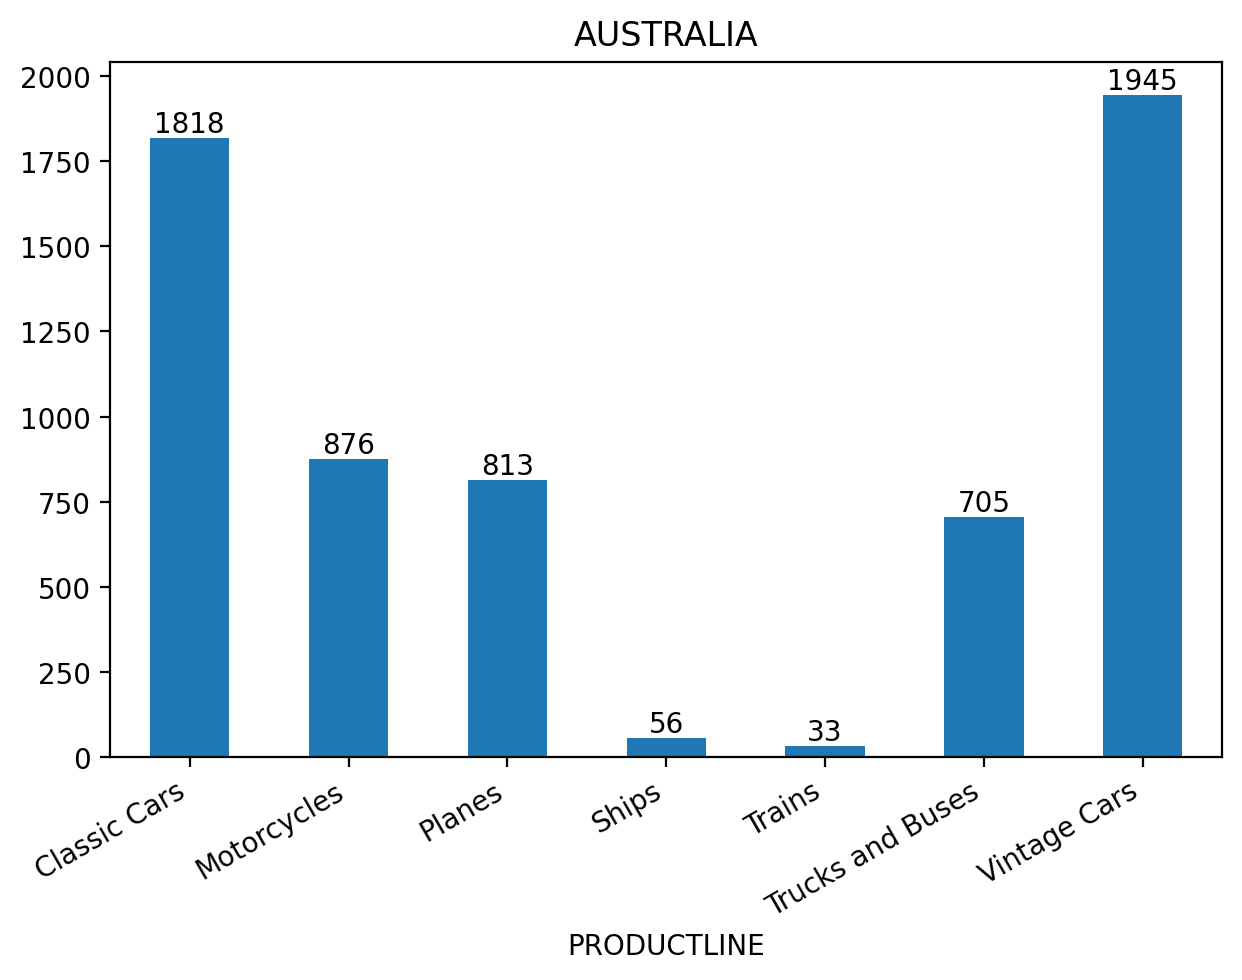

In [30]:
dfTemp = df.loc[df.loc[:, 'TERRITORY2'] == territories_var[2], ['PRODUCTLINE', 'QUANTITYORDERED']]
dfTemp = dfTemp.groupby(['PRODUCTLINE']).sum()
dfTemp = dfTemp.reset_index()
ax = dfTemp.plot(x='PRODUCTLINE', y='QUANTITYORDERED', kind='bar', legend=False, rot=0)
ax.bar_label(ax.containers[0], label_type='edge')
plt.title(territories_var[2])
plt.tight_layout()
plt.gcf().autofmt_xdate()
plt.savefig("images/australia_product_line.png")
plt.show()

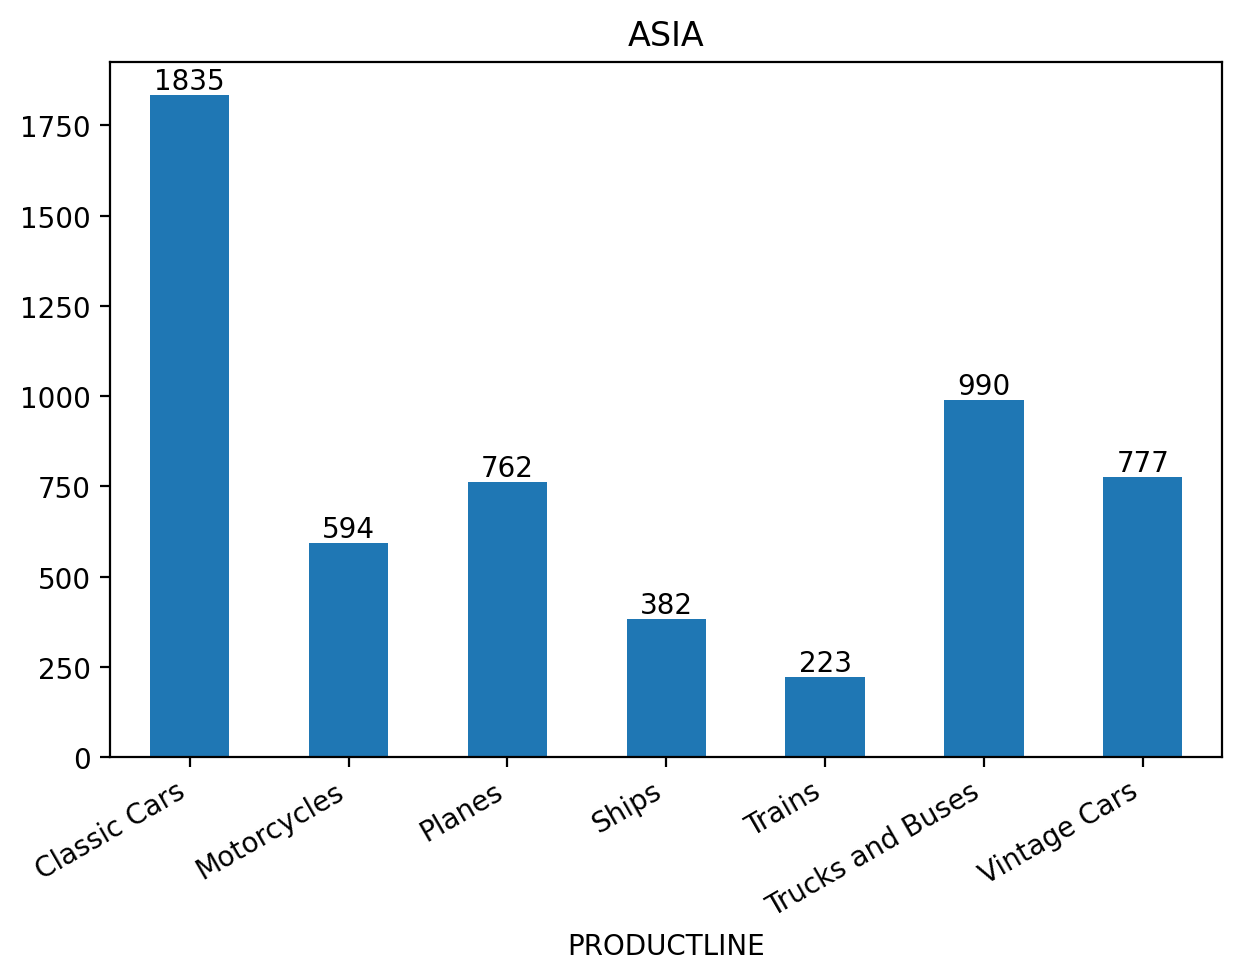

In [31]:
dfTemp = df.loc[df.loc[:, 'TERRITORY2'] == territories_var[3], ['PRODUCTLINE', 'QUANTITYORDERED']]
dfTemp = dfTemp.groupby(['PRODUCTLINE']).sum()
dfTemp = dfTemp.reset_index()
ax = dfTemp.plot(x='PRODUCTLINE', y='QUANTITYORDERED', kind='bar', legend=False, rot=0)
ax.bar_label(ax.containers[0], label_type='edge')
plt.title(territories_var[3])
plt.tight_layout()
plt.gcf().autofmt_xdate()
plt.savefig("images/asia_product_line.png")
plt.show()

# Model